# Implementing Attention 

## Attention
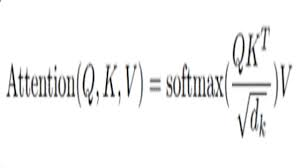


- The mathematical mechanism is reffered to as scaled dot-product attention.  (the how behind self attention)
- Self-attention is when a sequence attends to itself. Each position can attend to all positions, including itself! This is the building block of transformers.
- In self-attention, Q, K, and V all come from the same input sequence. We use learned linear transformations to create Q, K, V from the input.
- **Self-attention is the high-level concept of an attention mechanism applied to a single sequence.**

**WHAT DOES Q, K, V means??**
- Q (Query): What we're looking for
- K (Key): What we're comparing against
- V (Value): The actual information we extract
- d_k: Dimension of keys (for scaling)

In [1]:
import torch
import torch.nn as nn

In [2]:
import torch.nn.functional as F

In [3]:
import numpy as np

### scaled dot product attention

In [4]:
def scaled_dp_attn(Q, K, V):
    d_k = Q.size(-1) # dimension to sq. root 

    # QK^T
    scores = torch.matmul(Q, K.transpose(-2, -1)) # rule to follow during matrix multiplication

    scores = scores / np.sqrt(d_k)

    attn_w = F.softmax(scores, dim=-1) 

    output = torch.matmul(attn_w, V)

    return output, attn_w

In [9]:
batch_size, seq_len, d_k = 1, 4, 8

Q = torch.randn(batch_size, seq_len, d_k)
K = torch.randn(batch_size, seq_len, d_k)
V = torch.randn(batch_size, seq_len, d_k)

output, attn_weights = scaled_dp_attn(Q, K, V)

print(f'shape: Q: {Q.shape}\nK: {K.shape}\nV: {V.shape}\nAttention Weights shape: {attn_weights.shape}\n')
print(f'row should sum to 1:\nFirst row: {attn_weights[0]}\nSum: {attn_weights[0].sum(dim=-1)}')

shape: Q: torch.Size([1, 4, 8])
K: torch.Size([1, 4, 8])
V: torch.Size([1, 4, 8])
Attention Weights shape: torch.Size([1, 4, 4])

row should sum to 1:
First row: tensor([[0.5702, 0.2146, 0.1348, 0.0805],
        [0.3700, 0.0554, 0.3322, 0.2424],
        [0.3666, 0.2060, 0.2040, 0.2233],
        [0.1197, 0.3181, 0.1580, 0.4042]])
Sum: tensor([1.0000, 1.0000, 1.0000, 1.0000])


### Self Attention

In [7]:
class SelfAttention(nn.Module):

    def __init__(self, embed_dim):
        super().__init__() 
        self.embed_dim = embed_dim
    
        self.query = nn.Linear(embed_dim, embed_dim, bias=False)
        self.key = nn.Linear(embed_dim, embed_dim, bias=False)
        self.value = nn.Linear(embed_dim, embed_dim, bias=False)

    def forward(self, x): 
        Q = self.query(x)
        K = self.key(x)
        V = self.value(x)
        
        scores = Q @ K.transpose(-2, -1)
        # scores = torch.matmul(Q, K.transpose(-2, -1))
        scores = scores / (self.embed_dim ** 0.5) # sqrt
        attn_weights = F.softmax(scores, dim=-1)

        outputs = attn_weights @ V 
        return outputs , attn_weights

In [10]:
dimension = 64 
seq_len = 10 
batch_size = 2 

self_attn = SelfAttention(dimension)
x = torch.randn(batch_size, seq_len, dimension)

output, attn_weights = self_attn(x)

print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")
print(f"Attention weights shape: {attn_weights.shape}")
print(f"\nAttention weights for first sequence, first position:")
print(attn_weights[0, 0])
print(f"Sum: {attn_weights[0, 0].sum():.3f} (should be 1.0)")

Input shape: torch.Size([2, 10, 64])
Output shape: torch.Size([2, 10, 64])
Attention weights shape: torch.Size([2, 10, 10])

Attention weights for first sequence, first position:
tensor([0.0965, 0.1467, 0.1641, 0.0744, 0.0834, 0.0951, 0.0997, 0.0602, 0.1100,
        0.0698], grad_fn=<SelectBackward0>)
Sum: 1.000 (should be 1.0)
